In [1]:
from pathlib import Path
from PIL import Image
import os
import numpy as np
from tqdm import tqdm

In [2]:
PROCESSED_DIR = Path('/home/macosta/ttmp/primus-processed/')
SAVEPATH = Path('/home/macosta/ttmp/primus-txt-blocks')
SAVEPATH.mkdir(exist_ok=True)

  0%|                                                 | 0/87678 [00:00<?, ?it/s]

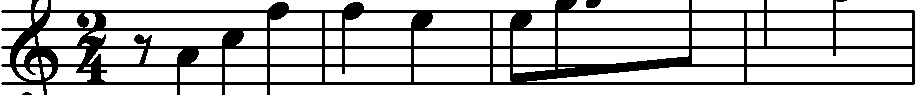

  0%|                                                 | 0/87678 [00:00<?, ?it/s]

[[1 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]]


Exception: 

In [7]:
for file in tqdm(os.listdir(PROCESSED_DIR)):
    x = 0
    filepath = PROCESSED_DIR / file
    savepath = SAVEPATH / f"{filepath.name[:-4]}.txt"
#     writefile = open(savepath, "w")
    image = (1 - np.array(Image.open(filepath), dtype=np.uint8))
    Image.open(filepath).show()
    full_text = ''
    for i in range(0, image.shape[1] - 15, 15):
        for j in range(13, 13 + 18 * 4, 18):
            block = image[j:j+15, i:i+15]
            x += 1
            if x == 8:
                print(block)
                raise Exception()
            flattened = block.flatten()
            string = ''.join([str(x) for x in flattened])
            full_text += f"{string} "
    full_text = full_text.strip()
#     writefile.write(full_text)
    writefile.close()